In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tags = [
"international",
"rock",
"ambient",
"jazz funk",
"lounge",
"alternative pop rock",
"cool",
"acid jazz",
"indie rock",
"latin pop",
"hardcore",
"mellow",
"jazz instrument",
"progressive metal",
"female vocalists",
"rock nroll",
"swedish",
"punk revival",
"new wave",
"electronica",
"alternative",
"alternative indie rock",
"hip hop",
"power pop",
"post punk",
"electronic",
"punk rock",
"guitar jazz",
"chill",
"90s",
"jazz pop",
"blues",
"heavy metal",
"brazilian traditions",
"pop",
"80s",
"punk",
"garage rock",
"synthpop",
"00s",
"pop rock",
"funk",
"guitar",
"latin",
"hard rock",
"70s",
"dutch",
"chillout",
"jazz",
"hardcore punk",
"japanese",
]

In [ ]:
corpus = [None] * len(tags)

for i in range(len(tags)):
  corpus[i] = [tags[i]]

In [ ]:
corpus[0]

['international']

In [ ]:
model = word2vec.Word2Vec(corpus, vector_size=100, window=20, min_count=1, workers=4)

In [ ]:
def tsne_plot(model, tags, perplexity=50, n_iter=5000):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in tags:
        tokens.append(model.wv[word])
        labels.append(word)


    tokens = np.array(tokens)
    print(tokens)
    print(tokens.shape)

    tsne_model = TSNE(perplexity=perplexity, n_components=2, n_iter=n_iter, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
model.wv.most_similar('chill')

[('blues', 0.23625122010707855),
 ('swedish', 0.17233823239803314),
 ('progressive metal', 0.13427738845348358),
 ('funk', 0.13158120214939117),
 ('jazz pop', 0.12389805912971497),
 ('jazz', 0.12295566499233246),
 ('female vocalists', 0.1099110096693039),
 ('punk rock', 0.0941951796412468),
 ('hip hop', 0.07309608161449432),
 ('cool', 0.06826312094926834)]

[[ 4.7042370e-03 -9.0638474e-03 -9.2372084e-03 ...  7.2757970e-03
   7.4805319e-03 -4.0329886e-03]
 [-2.5087667e-03 -5.9026573e-03  7.4833371e-03 ...  2.1546124e-03
   6.4040540e-04  9.5244702e-03]
 [-2.3748518e-04  4.2191767e-03  2.1141458e-03 ...  7.6670643e-05
  -5.9592726e-06  8.7101338e-03]
 ...
 [ 8.3489111e-03 -5.7309150e-04 -9.4367787e-03 ... -9.7564645e-03
   7.5821662e-03  7.9967510e-03]
 [-6.9636069e-03 -2.4585116e-03 -8.0229370e-03 ...  2.7393461e-03
   5.6154132e-03  2.5717581e-03]
 [-5.3622725e-04  2.3643136e-04  5.1033497e-03 ... -7.0415605e-03
   9.0145587e-04  6.3925339e-03]]
(51, 100)


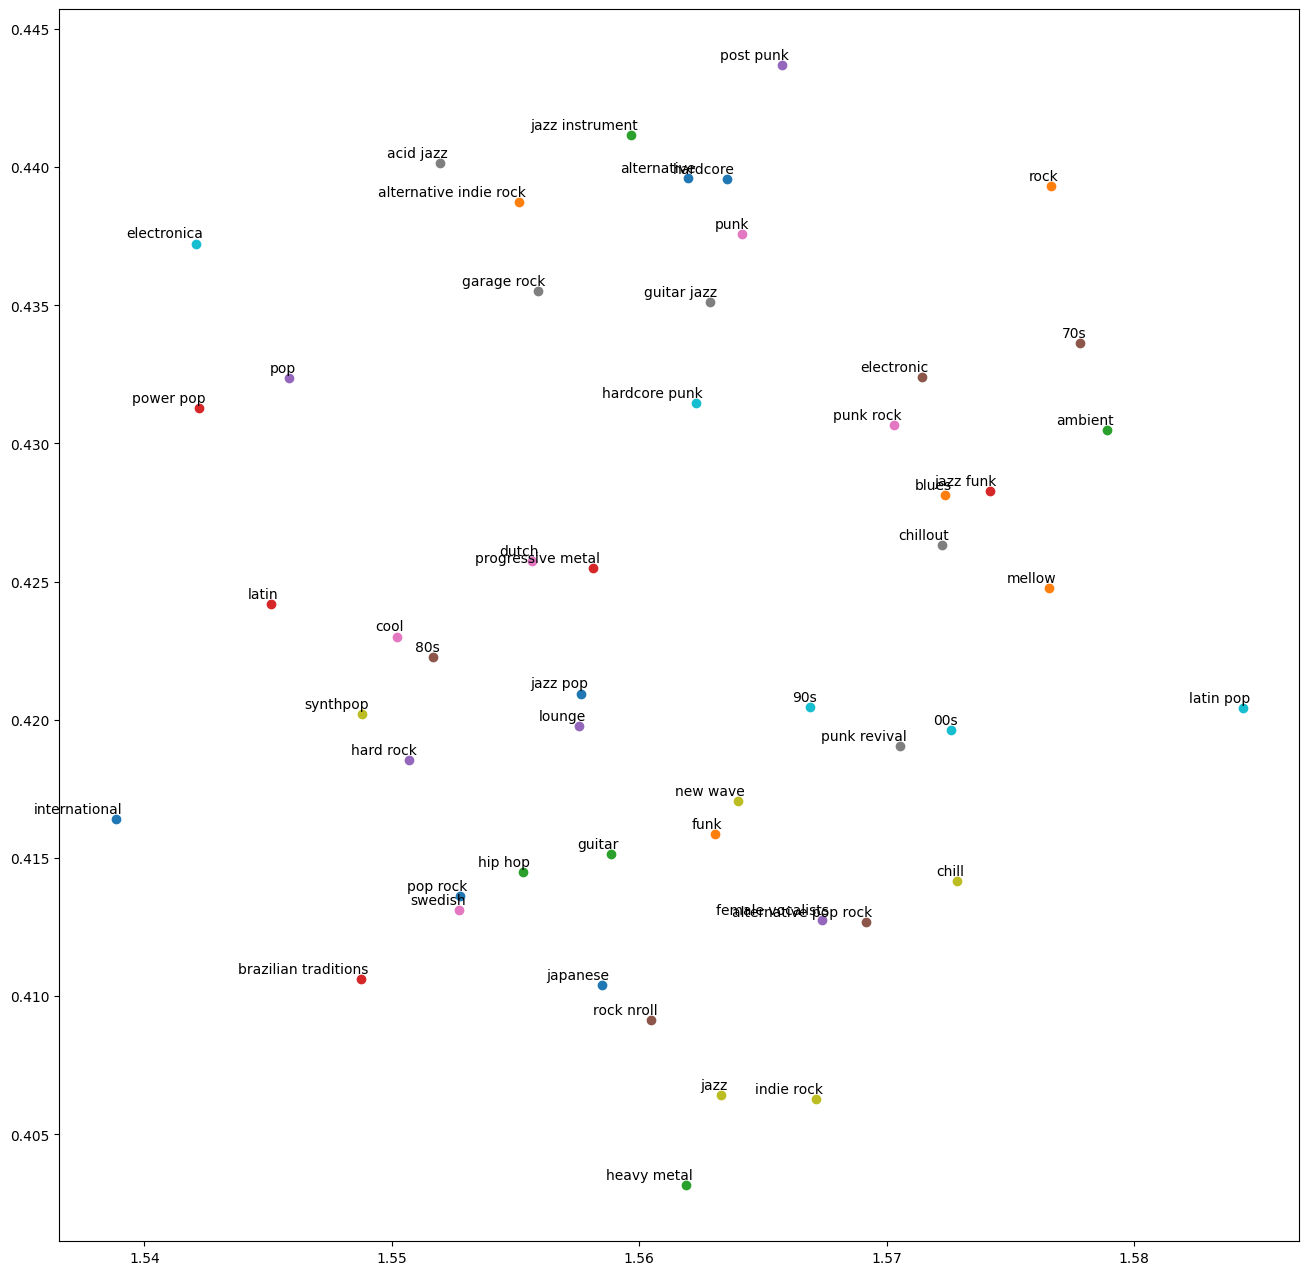

In [ ]:
tsne_plot(model, tags, perplexity=50)